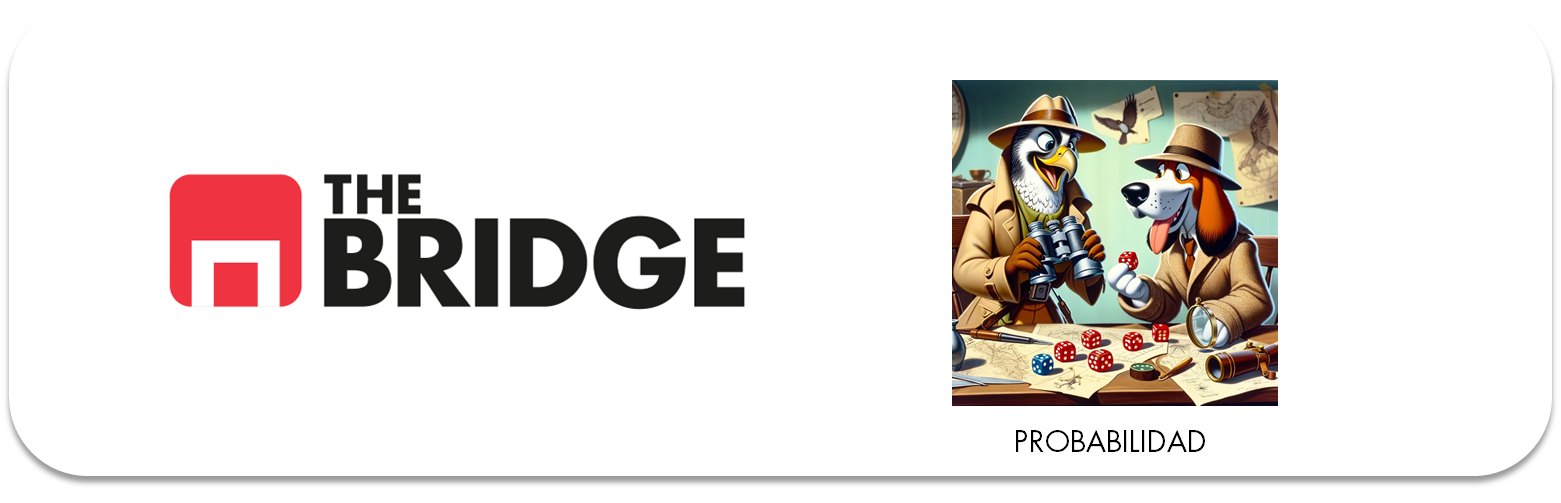

## PROBABILIDAD (II): Unión, intersección, probabilidad condicional e independencia

Para esta sesión seguimos tratando con el dataset del titanic y sus variables categóricas:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_titanic = pd.read_csv("./data/titanic.csv")


Existen otras formas de obtener las probabilidades de la unión de sucesos y de la intersección de sucesos que no son necesariamente aplicar la regla de Laplace. Empecemos con la unión.

### Obtención de probabilidades de unión de sucesos

Distinguimos dos casos, cuando los suscesos a unir son mutuamente excluyentes y cuando no. 

#### Unión de eventos mutuamente excluyentes

Recuerda que mutuamente excluyentes es que no pueden darse a la vez (matemáticamente la intersección de los conjuntos de sucesos excluyentes es el conjunto vacio porque no se pueden dar los dos eventos a la vez).

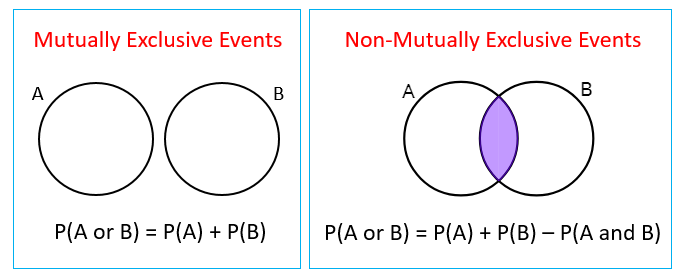

Si los eventos son *mutuamente excluyentes* entonces para calcular la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de su unión, simplemente sumamos sus [probabilidades](https://es.wikipedia.org/wiki/Probabilidad) individuales.

$p(E \cup F) = p(E) + p(F)$

$p(E \cap F) = 0$



Como ejemplo, obtengamos la probabilidad del suceso "ser mujer o niño" al escoger al azar un pasajero del titanic. Siguiendo la fórmula anterior:

$$ E = \text{"ser mujer"}$$
$$ F = \text{"ser niño"}$$

$$ E \cup F = \text{"ser mujer o niño"}$$
$$ p(\text{ser mujer o niño}) = p(E \cup F) = p(E) + p(F)$$

Obtenemos $p(E)$ y $p(F)$ usando la aproximación frecuencial:

In [ ]:
# p(E) frecuencia relativa de ser mujer:
p_E = df_titanic["who"].value_counts(normalize= True)["woman"]
p_F = df_titanic["who"].value_counts(normalize = True)["child"]
print("p(E) = ", p_E)
print("p(F) = ", p_F)

Y ahora la probabilidad de la unión $p(E \cup F)$ como la suma:

In [ ]:
p_E_U_F = p_E + p_F
print("p(escoger una pajero que sea mujer o niño) = p(E U F) = ", p_E_U_F)

Y comprobamos haciendo un calculo frecuencial del suceso combinado como lo hicimos anteriormente, al ser unión es un or de las condiciones:

In [ ]:
casos_favorables = len(df_titanic.loc[(df_titanic.who == "child") | (df_titanic.who == "woman")])
casos_totales = len(df_titanic)
print(casos_favorables/casos_totales)


#### Unión de eventos que no son mutuamente excluyentes
Si los eventos no son *mutuamente excluyentes* entonces debemos corregir la fórmula anterior para incluir el efecto de la superposición de los eventos. Esta superposición se da en el lugar de la *intersección* de los eventos; por lo tanto la formula para calcular la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de estos eventos es:

$p(E \cup F) = p(E) + p(F) - p(E \cap F)$

##### Ejemplo

Volviendo al Titanic, pensemos en obtener la probabilidad de que un pasajero al azar "sobreviviese o viajase solo". Ahora los sucesos no son excluyentes ya que hubo pasajeros que viajaban sólos y sobrevivieron. Usando la formula:


$p(E) = p(\text{sobrevivir})$:

In [ ]:
casos_favorables = len(df_titanic.loc[df_titanic.alive == "yes"])
casos_totales = len(df_titanic)
p_E = casos_favorables/casos_totales
print("p(E) = ", p_E)

$p(F) = p(\text{viajar solo})$

In [ ]:
casos_favorables = len(df_titanic.loc[df_titanic.alone])
casos_totales = len(df_titanic)
p_F = casos_favorables/casos_totales
print("p(F) = ", p_F)

$p(E \cap F) = p(\text{viajar solo y sobrevivir})$ que obtenemos frecuencialmente como hicimos en la sesión anterior

In [ ]:
casos_favorables = len(df_titanic.loc[(df_titanic.alive == "yes") & (df_titanic.alone)])
casos_totales = len(df_titanic)
p_E_x_F = casos_favorables/casos_totales
print("p(E x F) = ", p_E_x_F)

In [ ]:
p_E_U_F = p_E + p_F - p_E_x_F 
print("p(E U F) = ", p_E_U_F)

$$p(E \cup F) \approx 0.803 \neq 0.38 + 0.6$$

### Sucesos Independientes y Probabilidad Condicional

Antes de ver como obtener la probabilidad de la intersección de sucesos o eventos, es bueno introducir dos conceptos. Por un lado el de sucesos independientes y por otro el de probabiliad condicional:

**Sucesos Independientes**

*"En términos de probabilidad, los sucesos independientes son dos o más eventos cuya ocurrencia no afecta la probabilidad de ocurrencia de los otros. Esto significa que la ocurrencia de un evento no tiene influencia sobre la ocurrencia del otro."* (por ejemplo: la tiradas de un dado, el resultado de un partido de baloncesto y que llueva esa tarde)

Nota: En el caso del Titanic es realmente difícil encontrar sucesos o variables completamente independientes porque la gran mayoría están relacionadas como ya vimos al hacer su mini-EDA

**Probabilidad Condional**

Con frecuencia queremos conocer la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de algún evento, dado que otro evento ha ocurrido. **Esto se expresa simbólicamente como $p(E | F)$ y se lee como "la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de $E$ dado $F$".** El segundo evento se conoce como la *condición* y el proceso se refiere a veces como "condicionamiento en F". La [probabilidad condicional](https://es.wikipedia.org/wiki/Probabilidad_condicionada) es un concepto importante de estadística, porque a menudo estamos tratando de establecer que un factor tiene una relación con un resultado, como por ejemplo, que las personas que fuman cigarrillos tienen más [probabilidades](https://es.wikipedia.org/wiki/Probabilidad) de desarrollar cáncer de pulmón. La [probabilidad condicional](https://es.wikipedia.org/wiki/Probabilidad_condicionada) también se puede usar para definir la <a href="https://es.wikipedia.org/wiki/Independencia_(probabilidad)">independencia</a>. **Dos variables se dice que son <a href="https://es.wikipedia.org/wiki/Independencia_(probabilidad)">independientes</a> si la siguiente relación se cumple:**

$p(E | F) = p(E)$

Probabilidad de ser fumador si eres asmático

**Calculando la probabilidad condicional**  
Para calcular la probabilidad del evento $E$ dada la información de que el evento $F$ ha ocurrido utilizamos la siguiente formula:

$p(E | F) = \frac{p(E \cap F)}{p(F)}$

Esta formula es la que seguimos al final de la sesión anterior para calcular la probabilidad de que los pasajeros de tercera sobrevivieran, es decir la probabilidad de escoger un pasajero que sobrevivió condicionado a que fuera un pasajero de tercera:

$$E = \text{Sobrevir}$$
$$F = \text{Ser pasajero de tercera}$$

$p(E | F) = \frac{p(E \cap F)}{p(F)}$ que obteníamos empleando el  metodo frecuencial para numerador y denominador y simplificando. Vamos a hacerlo ahora calculando las dos probabilidades por separado:

$p(E \cap F)$ la obtuvimos como ejemplo de intersección de sucesos:

In [ ]:
#Como es una intersección es aplicar un AND:
superviviente = df_titanic.alive == "yes"
viajar_tercera = df_titanic["class"] == "Third"
casos_favorables = len(df_titanic[superviviente & viajar_tercera]) # Esto equivale a calcular la cardinalidad del conjunto INTERSECCION
casos_totales = len(df_titanic)

p_E_x_F = casos_favorables/casos_totales

$p(F)$ se obtiene de calcular la frecuencia relativa de pasajeros de tercera, pero vamos a obtenerla como una "probabilidad":

In [ ]:
casos_favorables = len(df_titanic.loc[df_titanic["class"] == "Third"])
casos_totales = len(df_titanic)
p_F = casos_favorables/casos_totales

Y la probabiliad condicional:

In [ ]:
p_condicionada = p_E_x_F / p_F 
print("p(E|F) = ", p_condicionada)

Que, como era de esperar, es el mismo valor que nos salió en la píldora anterior.

### Obtención de probabilidades de intersección de sucesos

Para ver formas alternativas de obtener la probabilidad de la interesección de suscesos o eventos los vamos a dividir en dos tipos también, pero ahora tratamos sucesos independientes y sucesos dependiendetes.

#### Intersección de eventos independientes
Para calcular la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de que ocurran varios eventos (la intersección de varios eventos), se multiplican sus [probabilidades](https://es.wikipedia.org/wiki/Probabilidad) individuales. La fórmula específica utilizada dependerá de si los eventos son <a href="https://es.wikipedia.org/wiki/Independencia_(probabilidad)">independientes</a> o no.
Si son <a href="https://es.wikipedia.org/wiki/Independencia_(probabilidad)">independientes</a>, la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de $E$ y $F$ se calcula como:

$p(E \cap F) = p(E) \times p(F)$

#### Ejemplo
Tiro tres dados. ¿Cuál es la probabilidad de que en las tres tiradas salga un 4? Se trata de tres eventos independientes, y la probabilidad de ocurra cada uno de ellos por separado es de 1/6.

Por tanto, la probabilidad de que en las tres tiradas salga un 4, será de (1/6) * (1/6) * (1/6) = (1/216) = 0.46 %

#### Intersección de eventos no independientes
Si dos eventos no son <a href="https://es.wikipedia.org/wiki/Independencia_(probabilidad)">independientes</a>, debemos conocer su [probabilidad condicional](https://es.wikipedia.org/wiki/Probabilidad_condicionada) para poder calcular la [probabilidad](https://es.wikipedia.org/wiki/Probabilidad) de que ambos se produzcan. La fórmula en este caso es:

$p(E \cap F) = p(E) \times p(F|E)$

#### Ejemplo
Saco dos cartas de una baraja española (sin devolverlas al mazo), ¿cuál es la probabilidad de que ambas cartas sean reyes?

Si el evento E es "obtener un rey la primera vez que sacamos carta", P(E) = 4/40. Si no devuelvo la carta al mazo, se quedaría con 39 cartas. Ahora necesito calcular la probabilidad del segundo evento, es decir, la probabilidad de que la segunda vez que saque carta sea un rey, codicionado al evento anterior, por tanto, P(F/E) = 3/39.

Por tanto, nuestra probabilidad de obtener dos reyes en dos cartas consecutivas es de: (4/40) * (3/39) = 12/1560

In [ ]:
12/1560